## 🏡📈 Analyse Approfondie des Prix Immobiliers : Défis et Solutions en Régression

#### LEPERCQ Louise, NITA Carmen Andreea, SARR Adja, THIOUNE Magatte Niang - M2 SIAD Projet BI / Big Data

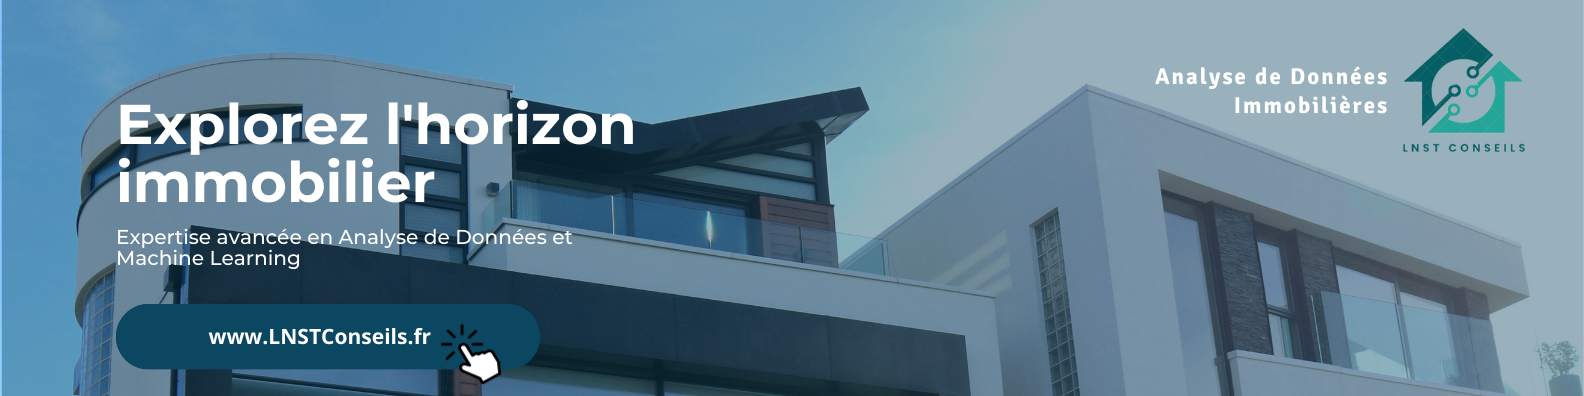

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px; display: inline-block;">
💡 <strong> Compétition Kaggle </strong>

House Prices - Advanced Regression Techniques : Predict sales prices and practice feature engineering, RFs, and gradient boosting
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

</div>

## Etape 5 - Statistiques descriptives

1. [Introduction](#introduction)
1. [Présentation de la base de données](#stats_desc)
    1. [Statistiques univariées](#stats_univariees)
    1. [Statistiques bivariées](#stats_bivariees)

# Partie 1 - Introduction <a class="anchor"  id="introduction"></a>
-----------------

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px; display: inline-block;">

- Depuis plusieurs années, le marché de l’immobilier fluctue. Plusieurs facteurs entrent en jeu, chacun contribuant à l'évolution complexe du **marché immobilier**. Lorsque l’économie progresse, la demande de logements augmente généralement, ce qui peut impacter positivement les prix des logements. Et inversement, une baisse de l'économie peut provoquer une baisse des prix des logements. De plus, un autre facteur qui peut impacter les prix des logements est la localisation des logements. Les prix des logements en métropole seront plus élevés que les prix des logements se situant en pleine campagne. Puis, les caractéristiques du logement seront aussi déterminants pour le prix du logement.

- Aujourd’hui notre entreprise **LNST Conseils** a été missionnée de réaliser une **analyse prédictive des prix des logements**. Pour cela, nous avons un disposition un fichier dans lequel nous pouvons retrouver des caractéristiques du logement, ainsi que des informations sur la localisation du logement. Ce fichier va nous servir à tester différents modèles de prédiction et une fois affiner, le modèle sera capable de prédire le prix des logements selon leurs caractéristiques.

- Ce projet est ancré au sein de la **compétition Kaggle "House Prices - Advanced Regression Techniques"**. L'objectif fondamental qui sous-tend cette initiative est d'exploiter des approches avancées en matière de régression, notamment le *feature engineering* et la construction des modèles de prédiction des prix immobiliers d'une grande robustesse.

- L'**objectif** ultime est de développer un modèle qui puisse offrir des prédictions fiables et précises sur les prix immobiliers. Cette compétition Kaggle offre une opportunité exceptionnelle d'explorer et de mettre en œuvre des techniques de pointe en matière d'apprentissage automatique pour résoudre un défi concret dans le domaine de l'immobilier.

</div>

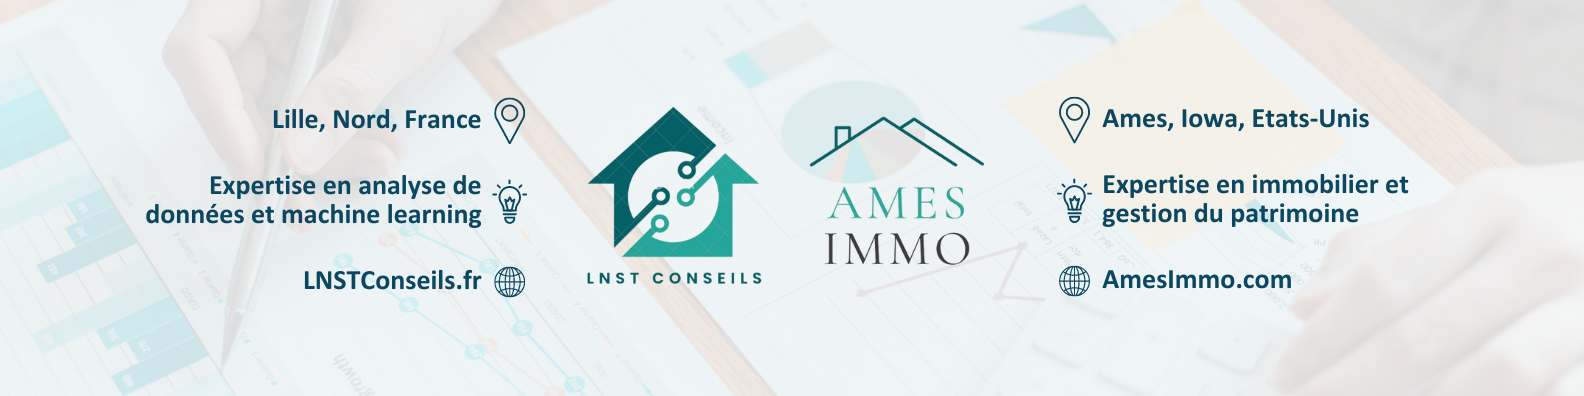

📝 **Comment naviguer dans ce notebook :**

Dans ce notebook, vous pouvez naviguer efficacement en suivant ces étapes simples :

- **Consultez les _définitions statistiques_ (📚) :** Les définitions sont données de manière fonctionnelle pour clarifier les concepts clés utilisés dans l'analyse. Comprendre ces définitions est crucial pour une bonne interprétation des résultats statistiques et pour une application appropriée des techniques d'analyse des données.
<br><br/>
- **Lisez attentivement les _observations_ (💡) :** Ces remarques expliquent les décisions statistiques ou fonctionnelles prises tout au long de l'étude. Elles éclairent sur les raisons pour lesquelles certaines approches ont été privilégiées et guident l'utilisateur dans le processus d'analyse en clarifiant des points spécifiques.
<br><br/>
- **Analysez les _interprétations_ (⚙️) :** Les observations fournissent des interprétations et des réflexions sur les résultats obtenus. Elles permettent de tirer des conclusions significatives et d'identifier des tendances ou des phénomènes intéressants dans les données analysées.

# Partie 2 - Statistiques descriptives <a class="anchor"  id="stats_desc"></a>
-----------------

In [ ]:
# Importation des bibliothèques

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency

In [ ]:
# Création du dataframe

data_etape5 = pd.read_csv('data_etape4.csv', sep = ',')
data_etape5.head()

superficieEtage1 superficieEtage2 superficieRallonge3Saisons  \
0      500-1000 m2      501-1000 m2  Pas de rallonge 3 saisons   
1     1000-1500 m2             0 m2  Pas de rallonge 3 saisons   
2      500-1000 m2      501-1000 m2  Pas de rallonge 3 saisons   
3      500-1000 m2      501-1000 m2  Pas de rallonge 3 saisons   
4     1000-1500 m2     1001-1500 m2  Pas de rallonge 3 saisons   

          typeAlleeAcces  nbChambres typeBatiment    conditionSousSol  \
0  Pas d'accès à l'allée           3  Unifamilial  Condition Ss Bonne   
1  Pas d'accès à l'allée           3  Unifamilial  Condition Ss Bonne   
2  Pas d'accès à l'allée           3  Unifamilial  Condition Ss Bonne   
3  Pas d'accès à l'allée           3  Unifamilial  Condition Ss Bonne   
4  Pas d'accès à l'allée           4  Unifamilial  Condition Ss Bonne   

     expositionSousSol superficieFinieSousSol1 superficieFinieSousSol2  ...  \
0    Aucune exposition             500-1000 m2                       0  ...   
1     Bonne exposition             500-1000 m2                       0  ...   
2  Exposition minimale                < 500 m2                       0  ...   
3    Aucune exposition                < 500 m2                       0  ...   
4   Exposition moyenne             500-1000 m2                       0  ...   

  superficieTotale mois_anneeVente  route_ville  autoroute proximite_gare  \
0          200-300          2-2008          Oui        Non            Non   
1          200-300          5-2007          Oui        Oui            Non   
2          200-300          9-2008          Oui        Non            Non   
3          200-300          2-2006          Oui        Non            Non   
4          300-400         12-2008          Oui        Non            Non   

  proximite_parc nbTotalSallesBain noteGlobale noteMoyenne  \
0            Non               3.5          12         6.0   
1            Non               2.5          14         7.0   
2            Non               3.5          12         6.0   
3            Non               2.0          12         6.0   
4            Non               3.5          13         6.5   

                      hauteurSs  
0  Hauteur sous-sol 2.3 - 2.5 m  
1  Hauteur sous-sol 2.3 - 2.5 m  
2  Hauteur sous-sol 2.3 - 2.5 m  
3    Hauteur sous-sol 2 - 2.2 m  
4  Hauteur sous-sol 2.3 - 2.5 m  

[5 rows x 106 columns]

In [ ]:
data_etape5.shape

(2903, 106)

In [ ]:
data_etape5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2903 entries, 0 to 2902
Columns: 106 entries, superficieEtage1 to hauteurSs
dtypes: float64(14), int64(17), object(75)
memory usage: 2.3+ MB


In [ ]:
VM = data_etape5.isnull().sum()
VM2=VM[VM > 0]
VM2

prix    1459
dtype: int64

<div class="alert alert-block alert-primary"; style="background-color: #BEDEDF; padding: 10px; display: inline-block;">
💡 <strong> Observation </strong>

Les statistiques descriptives sont réalisées dans l'outil de restitution. Ici, nous nous limitons à observer la distribution de base des variables.

</div>

## 2.1 - Statistiques univariées <a class="anchor"  id="stats_univariees"></a>


count      1444.000000
mean     163139.968801
std       65429.237667
min       32032.638336
25%      119135.715072
50%      148690.183680
75%      194788.729824
max      435974.304000
Name: prix, dtype: float64


<ipython-input-6-3fafff0b905c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_etape5['prix'], color='g', bins=100, hist_kws={'alpha': 0.4});


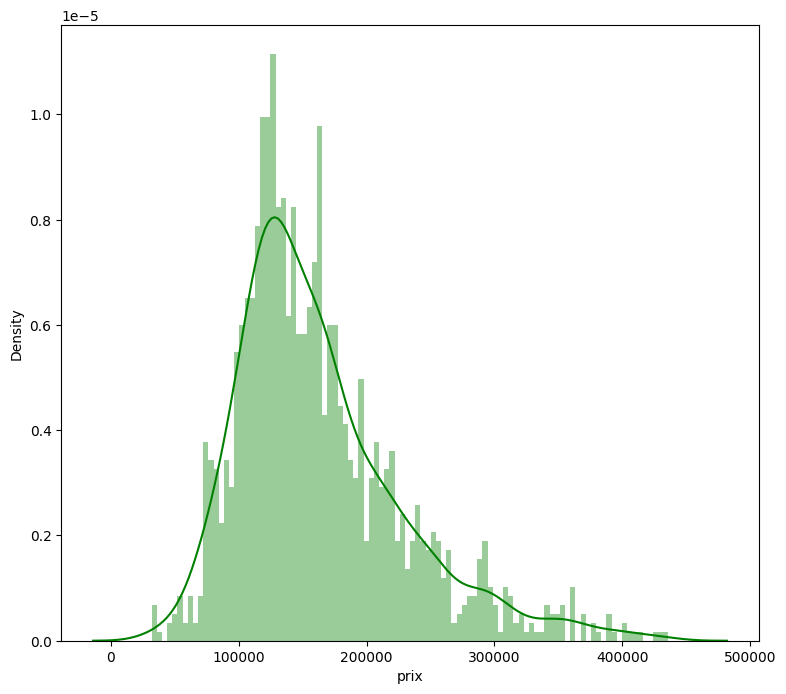

In [ ]:
# Répartition de la variable cible

print(data_etape5['prix'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data_etape5['prix'], color='g', bins=100, hist_kws={'alpha': 0.4});

<div class="alert alert-block alert-primary"; style="background-color: #bededf; padding: 10px;">
⚙️ <strong> Intérpretation </strong>

L'asymétrie à droite de la distribution suggère que le marché du logement est segmenté. Il existe un grand nombre de logements abordables, tandis qu'il y a un nombre plus restreint de logements plus chers.
    
</div>


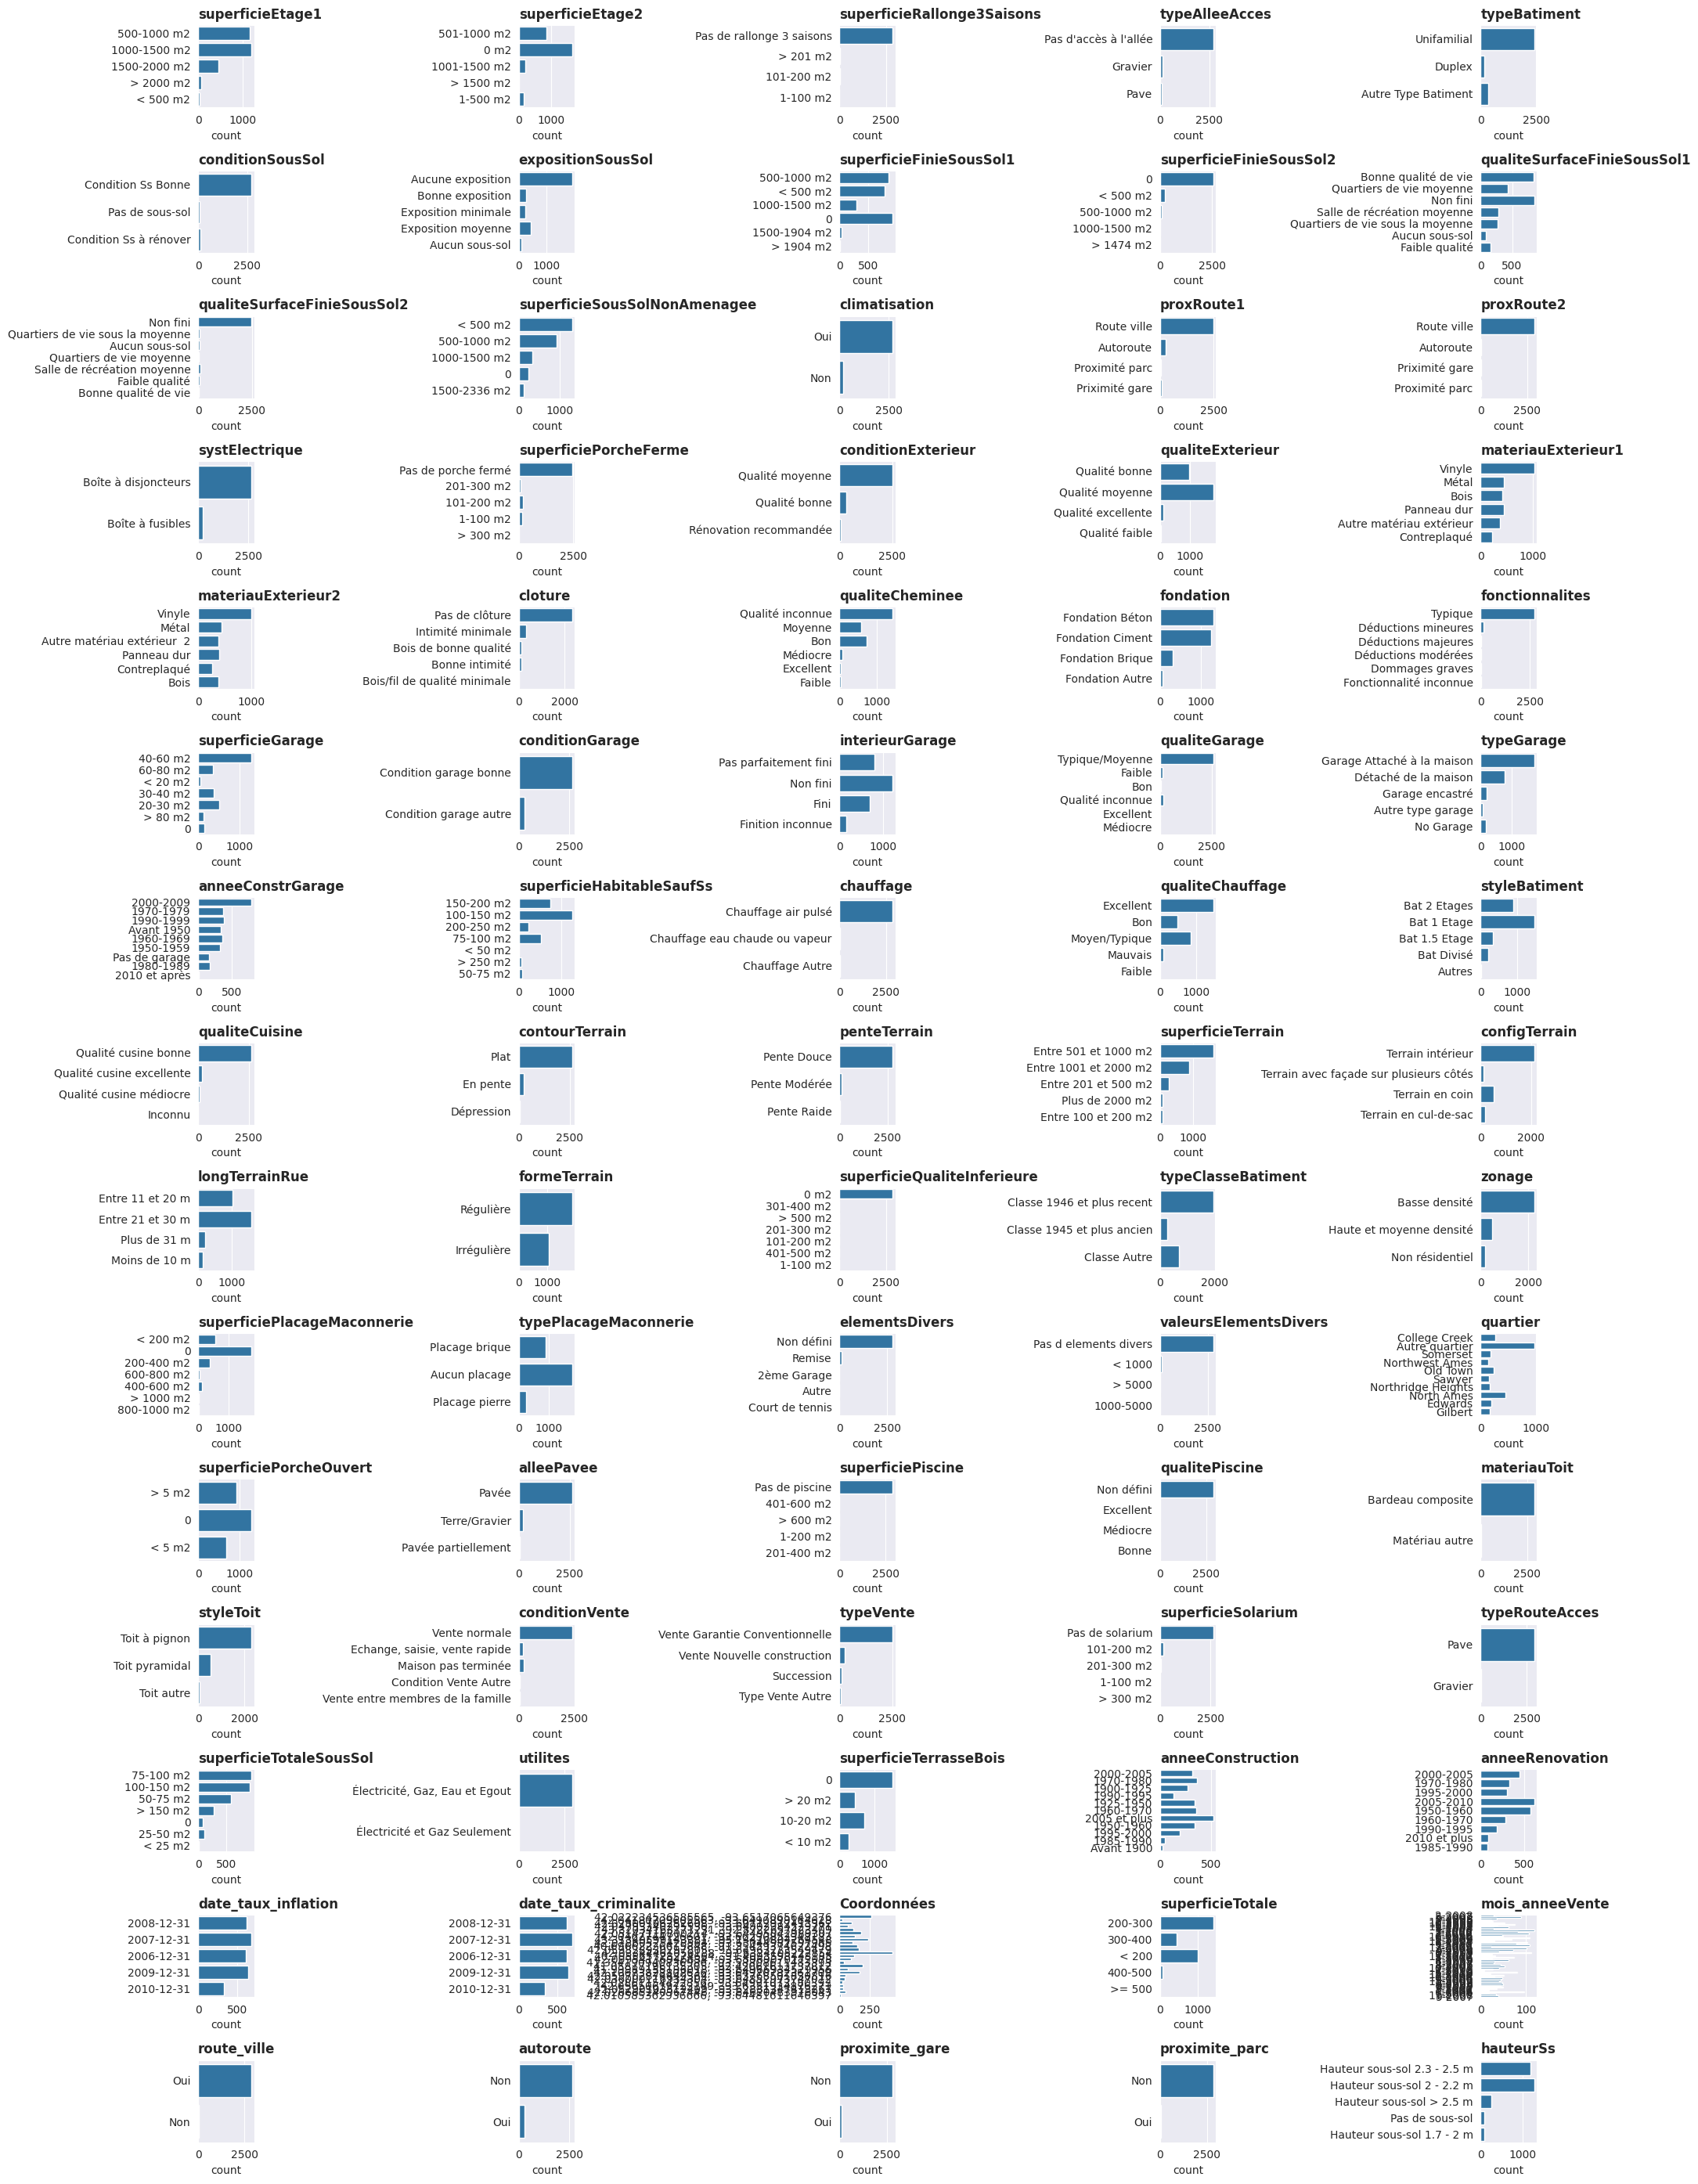

In [ ]:
# Récupération des variables catégorielles
categorical = pd.DataFrame(data_etape5.dtypes[data_etape5.dtypes == object]).reset_index().iloc[:, 0].tolist()

# Calcul du nombre de lignes et de colonnes en fonction du nombre de variables catégorielles
num_categorical = len(categorical)
num_cols = 5  # Définissez le nombre de colonnes par ligne
num_rows = -(-num_categorical // num_cols)  # Utilisation de l'opérateur de division entière pour arrondir vers le haut

sns.set_style('darkgrid')
plt.figure(figsize=(20, 28))  # Taille de la figure fixée à 20x28

for col in range(num_categorical):
    plt.subplot(num_rows, num_cols, col + 1)
    sns.countplot(data=data_etape5, y=categorical[col])
    plt.title(categorical[col], weight='bold', loc='left')
    plt.ylabel('')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-primary"; style="background-color: #bededf; padding: 10px;">
⚙️ <strong> Intérpretation </strong>

Ces graphiques nous offrent une vue d'ensemble des données relatives aux variables catégorielles.
    
</div>

In [ ]:
# Récupération des variables numériques
numerical = pd.DataFrame(data_etape5.dtypes[data_etape5.dtypes!=object]).reset_index().iloc[1::,0].to_list()
np.array(numerical)

array(['nbSallesBainSs', 'nbDemiSallesBainSs', 'nbCheminees',
       'nbSallesBain', 'nbPlacesVoiture', 'nbDemiSallesBain', 'id',
       'nbCuisines', 'moisVente', 'conditionGlobale', 'qualiteGlobale',
       'prix', 'nbPieces', 'anneeVente', 'taux_inflation',
       'changement_annuel_taux_inflation', 'annee_taux_inflation',
       'ames_taux_criminalite', 'iowa_taux_criminalite',
       'etatsunis_taux_criminalite', 'annee_taux_criminalite',
       'annee_indice_prix_logements', 'moyenne_indice_prix_logements',
       'Latitude', 'Longitude', 'ancienneteRenovation',
       'ancienneteConstruction', 'nbTotalSallesBain', 'noteGlobale',
       'noteMoyenne'], dtype='<U32')

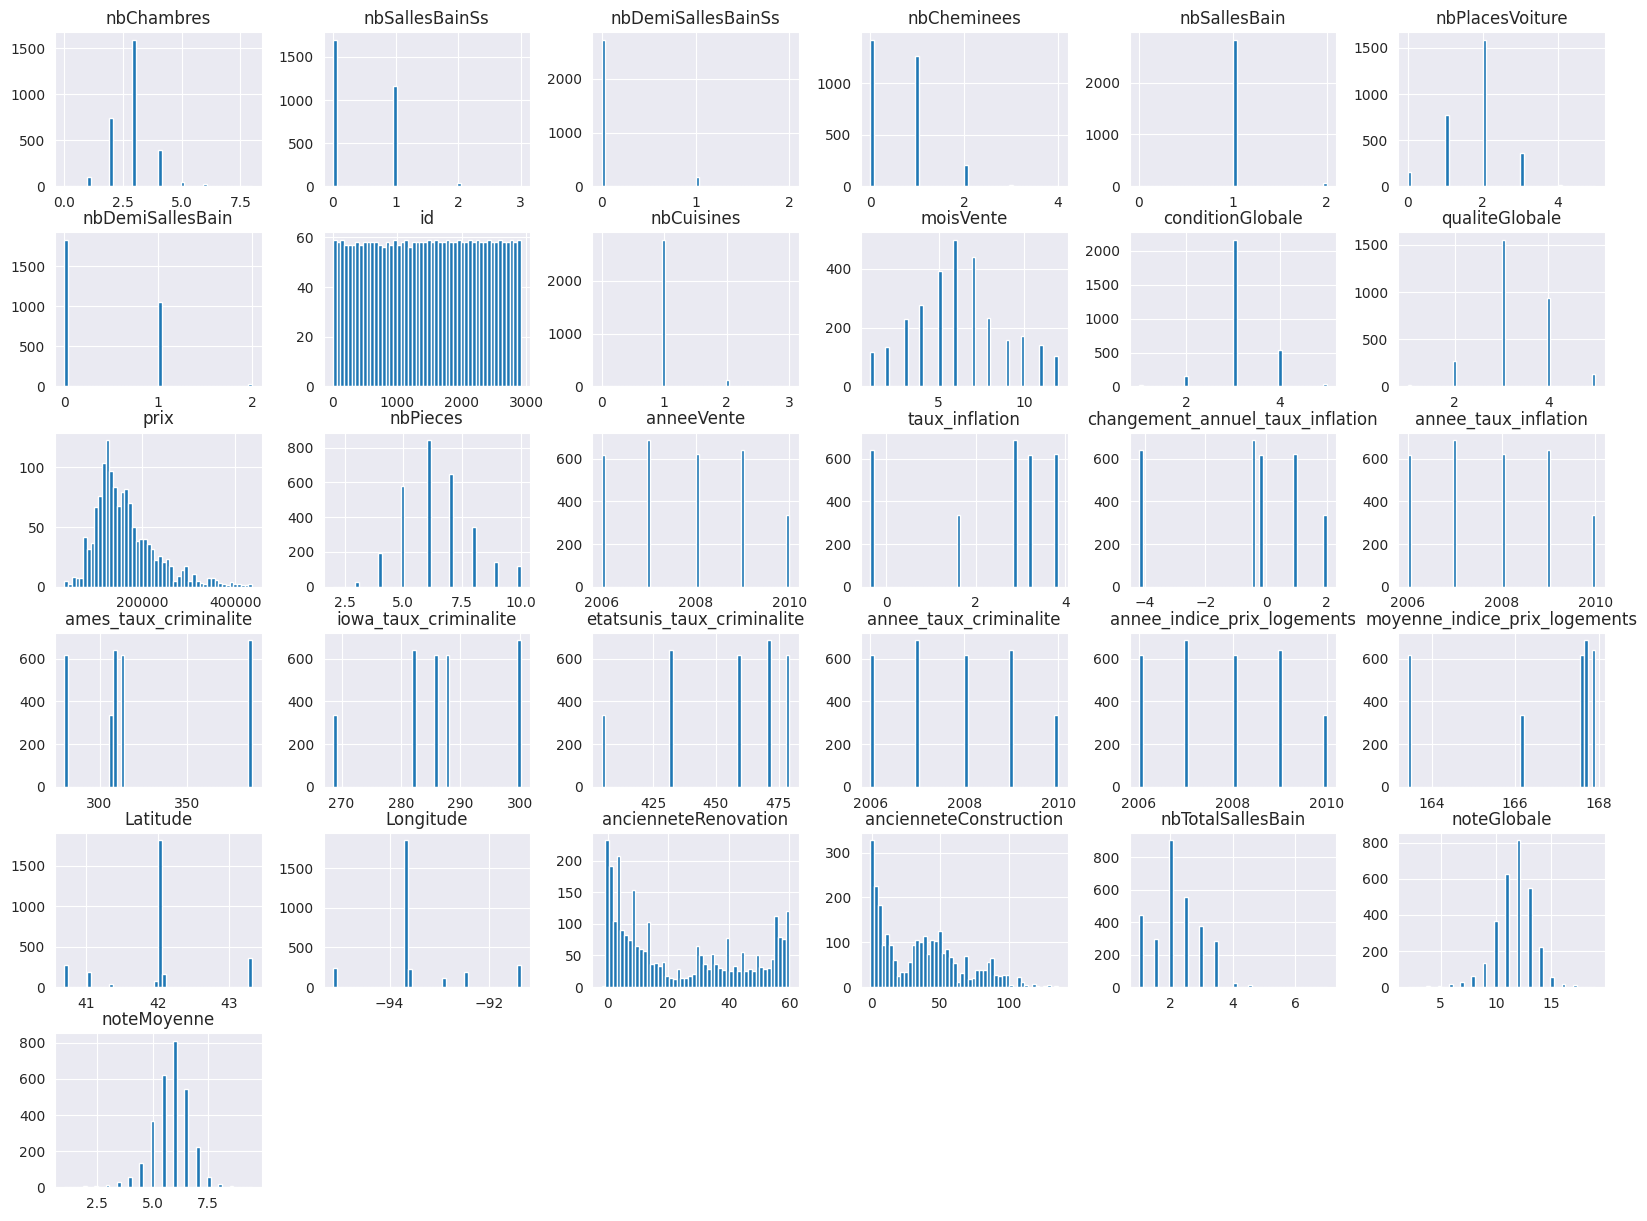

In [ ]:
# Répartition des variables numériques
data_etape5.hist(bins=50, figsize=(20,15))
plt.show()

<div class="alert alert-block alert-primary"; style="background-color: #bededf; padding: 10px;">
⚙️ <strong> Intérpretation </strong>

Ces graphiques nous offrent une vue d'ensemble des données relatives aux variables numériques.
    
</div>

In [ ]:
data_etape5.to_csv('data_etape5.csv', index = False)

## 2.2 - Statistiques bivariées <a class="anchor"  id="stats_bivariees"></a>

<div class="alert alert-block alert-primary"; style="background-color: #BEDEDF; padding: 10px; display: inline-block;">
💡 <strong> Observation </strong>

Dans cette partie, nous allons générer un pairplot, un outil de visualisation qui nous permet d'explorer rapidement les relations entre plusieurs variables dans un ensemble de données.

</div>

In [ ]:
numerical_columns = data_etape5.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_df = pd.DataFrame({'Colonnes': numerical_columns})
numerical_df

Colonnes
0                         nbChambres
1                     nbSallesBainSs
2                 nbDemiSallesBainSs
3                        nbCheminees
4                       nbSallesBain
5                    nbPlacesVoiture
6                   nbDemiSallesBain
7                                 id
8                         nbCuisines
9                          moisVente
10                  conditionGlobale
11                    qualiteGlobale
12                              prix
13                          nbPieces
14                        anneeVente
15                    taux_inflation
16  changement_annuel_taux_inflation
17              annee_taux_inflation
18             ames_taux_criminalite
19             iowa_taux_criminalite
20        etatsunis_taux_criminalite
21            annee_taux_criminalite
22       annee_indice_prix_logements
23     moyenne_indice_prix_logements
24                          Latitude
25                         Longitude
26              ancienneteRenovation
27            ancienneteConstruction
28                 nbTotalSallesBain
29                       noteGlobale
30                       noteMoyenne

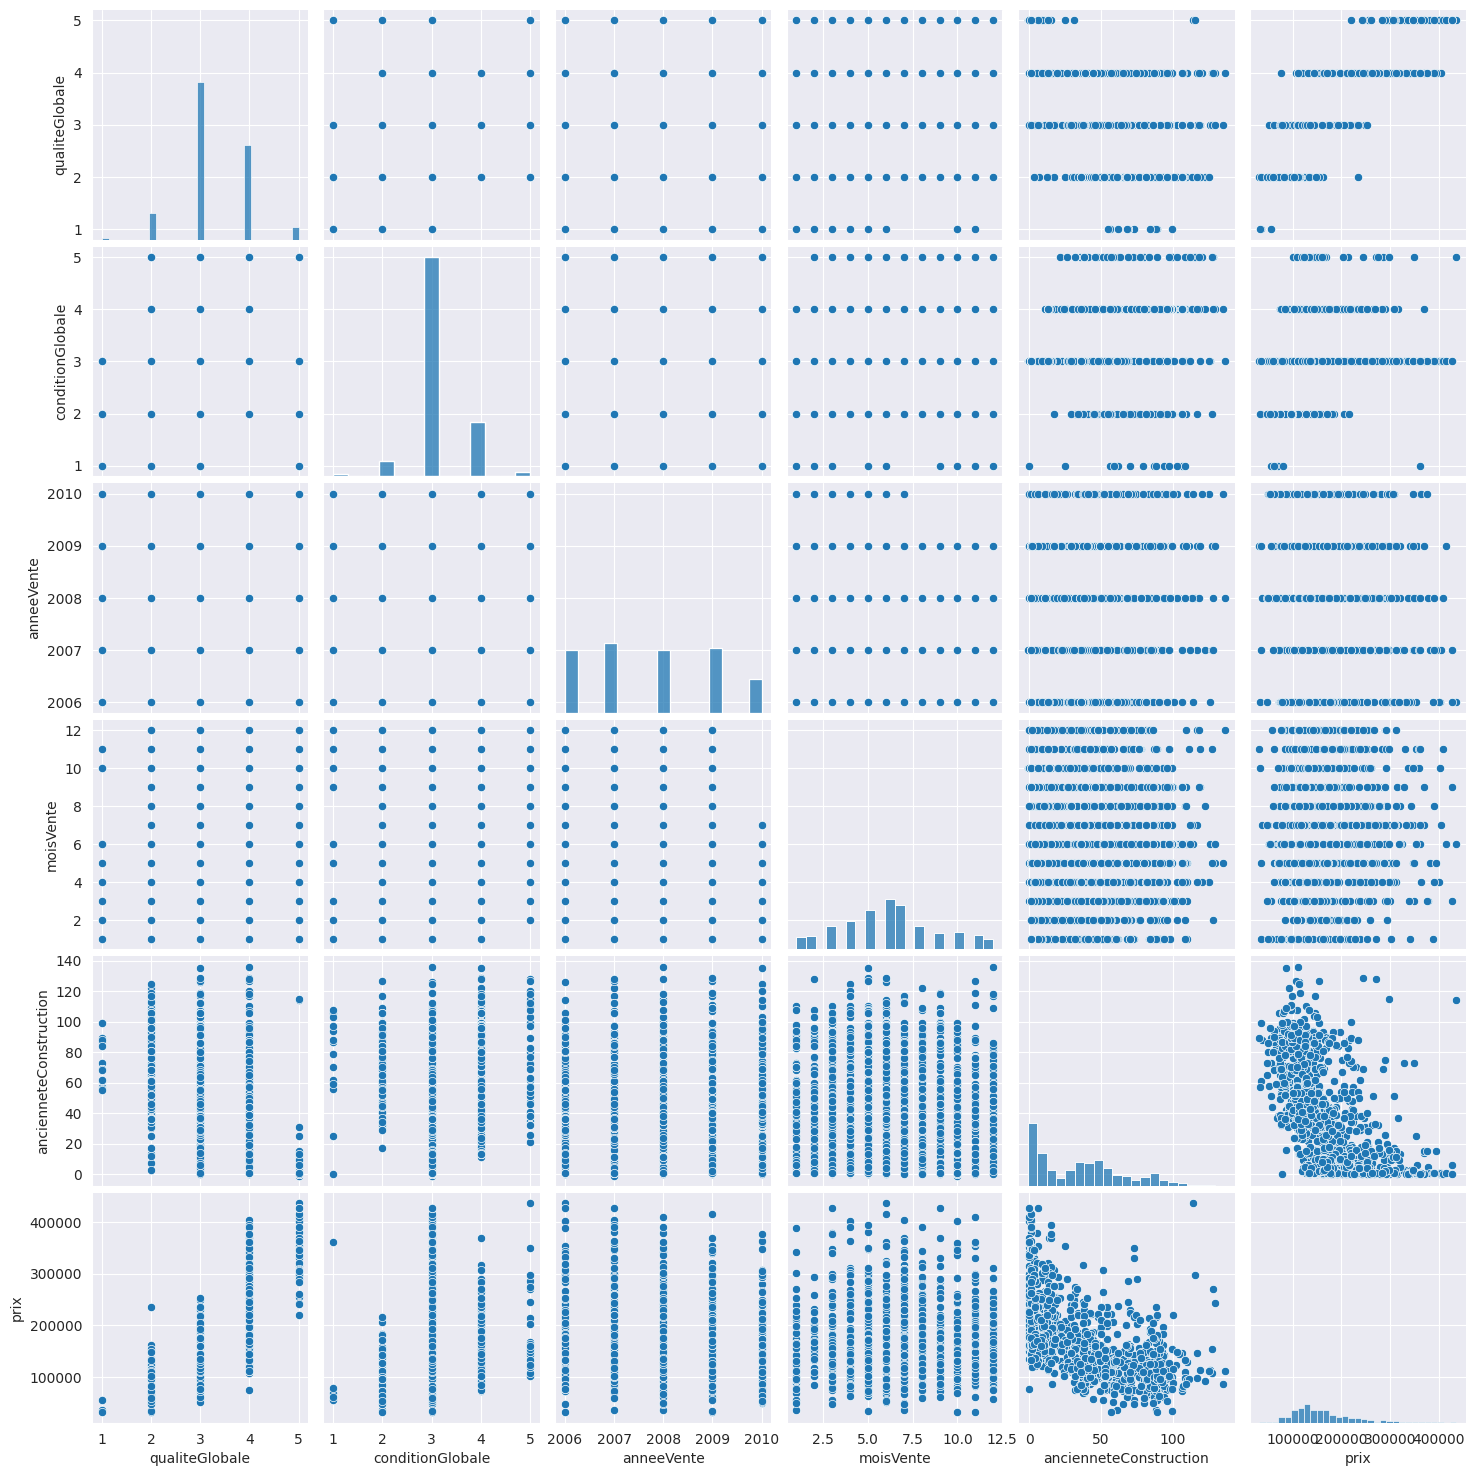

In [ ]:
sns.pairplot(data=data_etape5, vars=['qualiteGlobale', 'conditionGlobale', 'anneeVente', 'moisVente', 'ancienneteConstruction', 'prix'])


<div class="alert alert-block alert-primary"; style="background-color: #bededf; padding: 10px;">
⚙️ <strong> Intérpretation </strong>

Grâce à ces graphiques, nous pouvons observer la dispersion des données par  paires de variables, ce qui nous permet de visualiser les relations entre elles.

Par exemple, nous observons une tendance où le prix diminue en fonction de l'ancienneté de la rénovation. Plus la rénovation des logements est récente, plus leur prix semble être élevé.
    
</div>


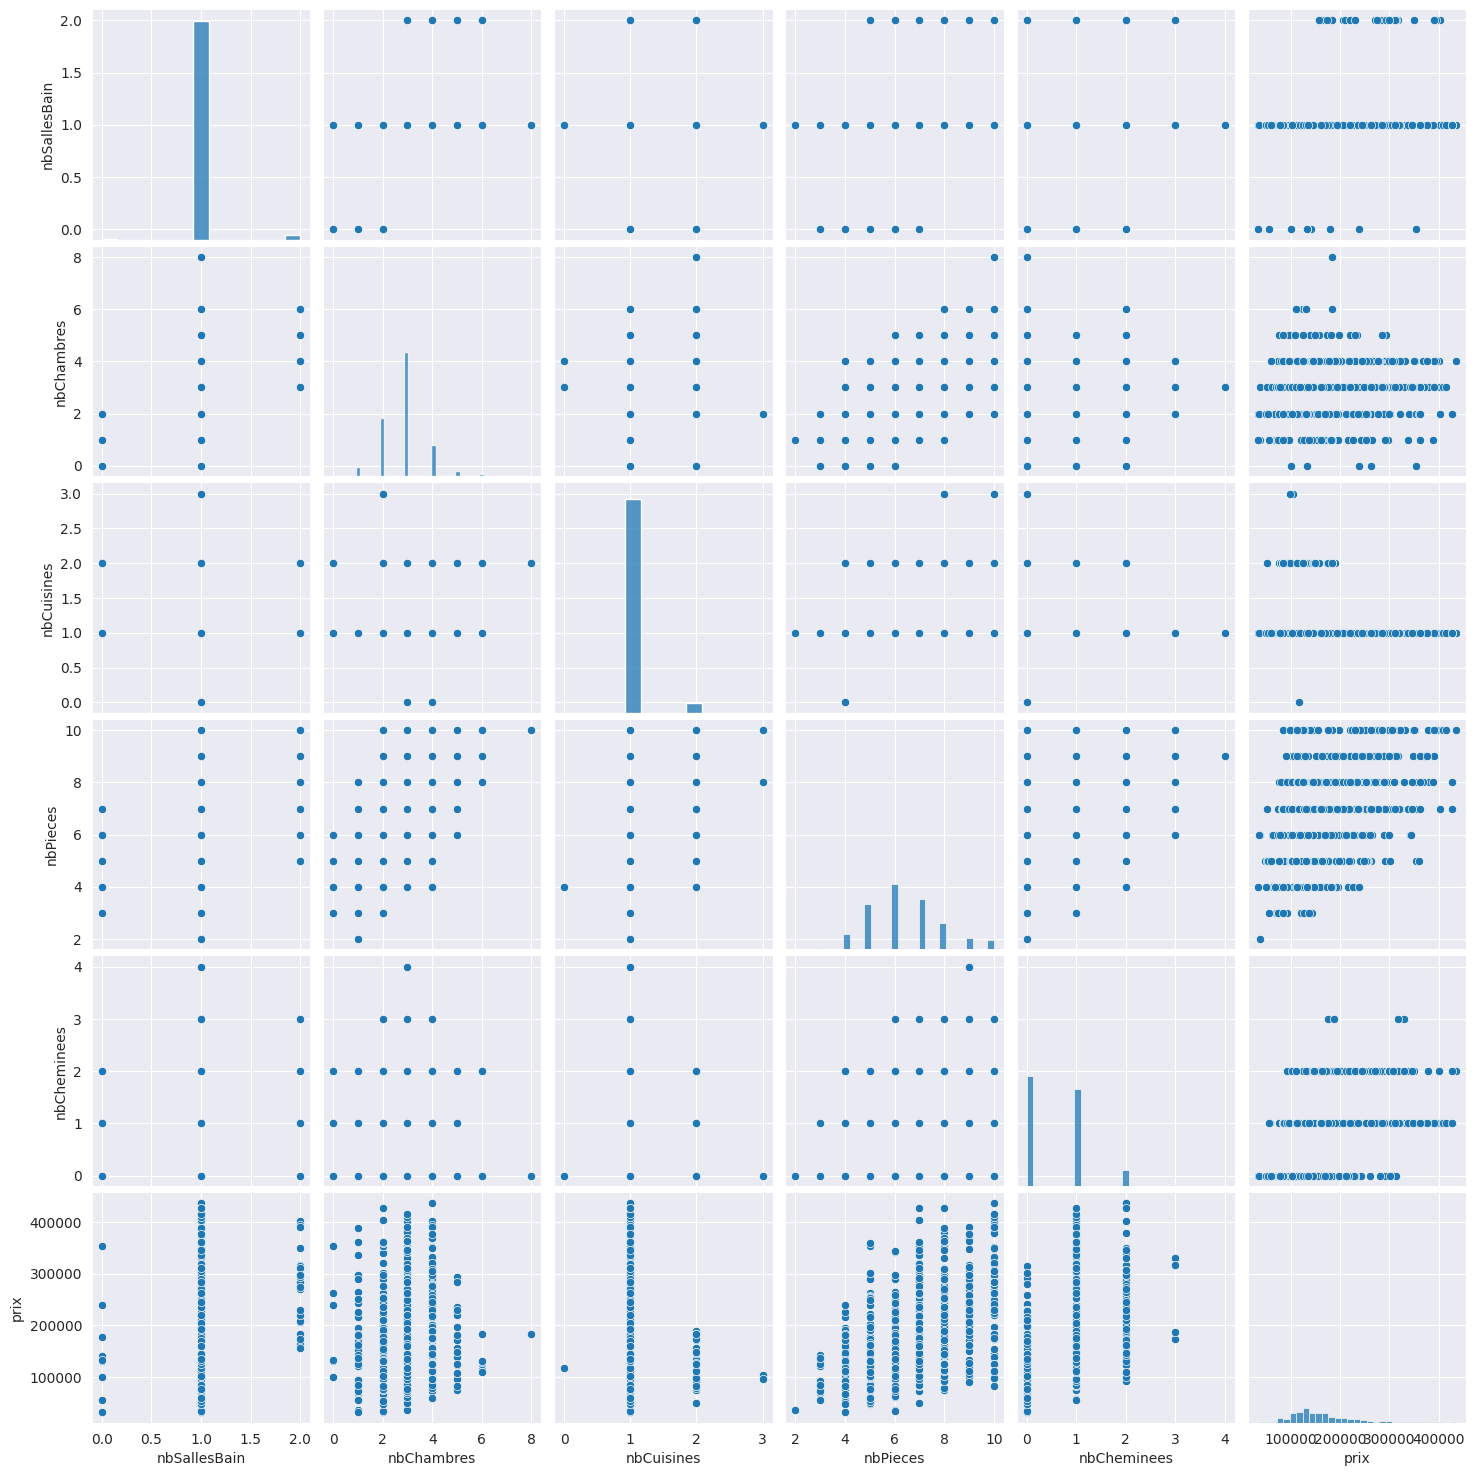

In [ ]:
sns.pairplot(data=data_etape5, vars=['nbSallesBain', 'nbChambres', 'nbCuisines', 'nbPieces', 'nbCheminees', 'prix'])



<div class="alert alert-block alert-primary"; style="background-color: #bededf; padding: 10px;">
⚙️ <strong> Intérpretation </strong>

De manière similaire, nous constatons par exemple que le prix tend à augmenter avec le nombre de pièces des maisons.
    
</div>


La suite présente la même chose, une grille de combinaisons de variables permettant d'observer leur distribution.

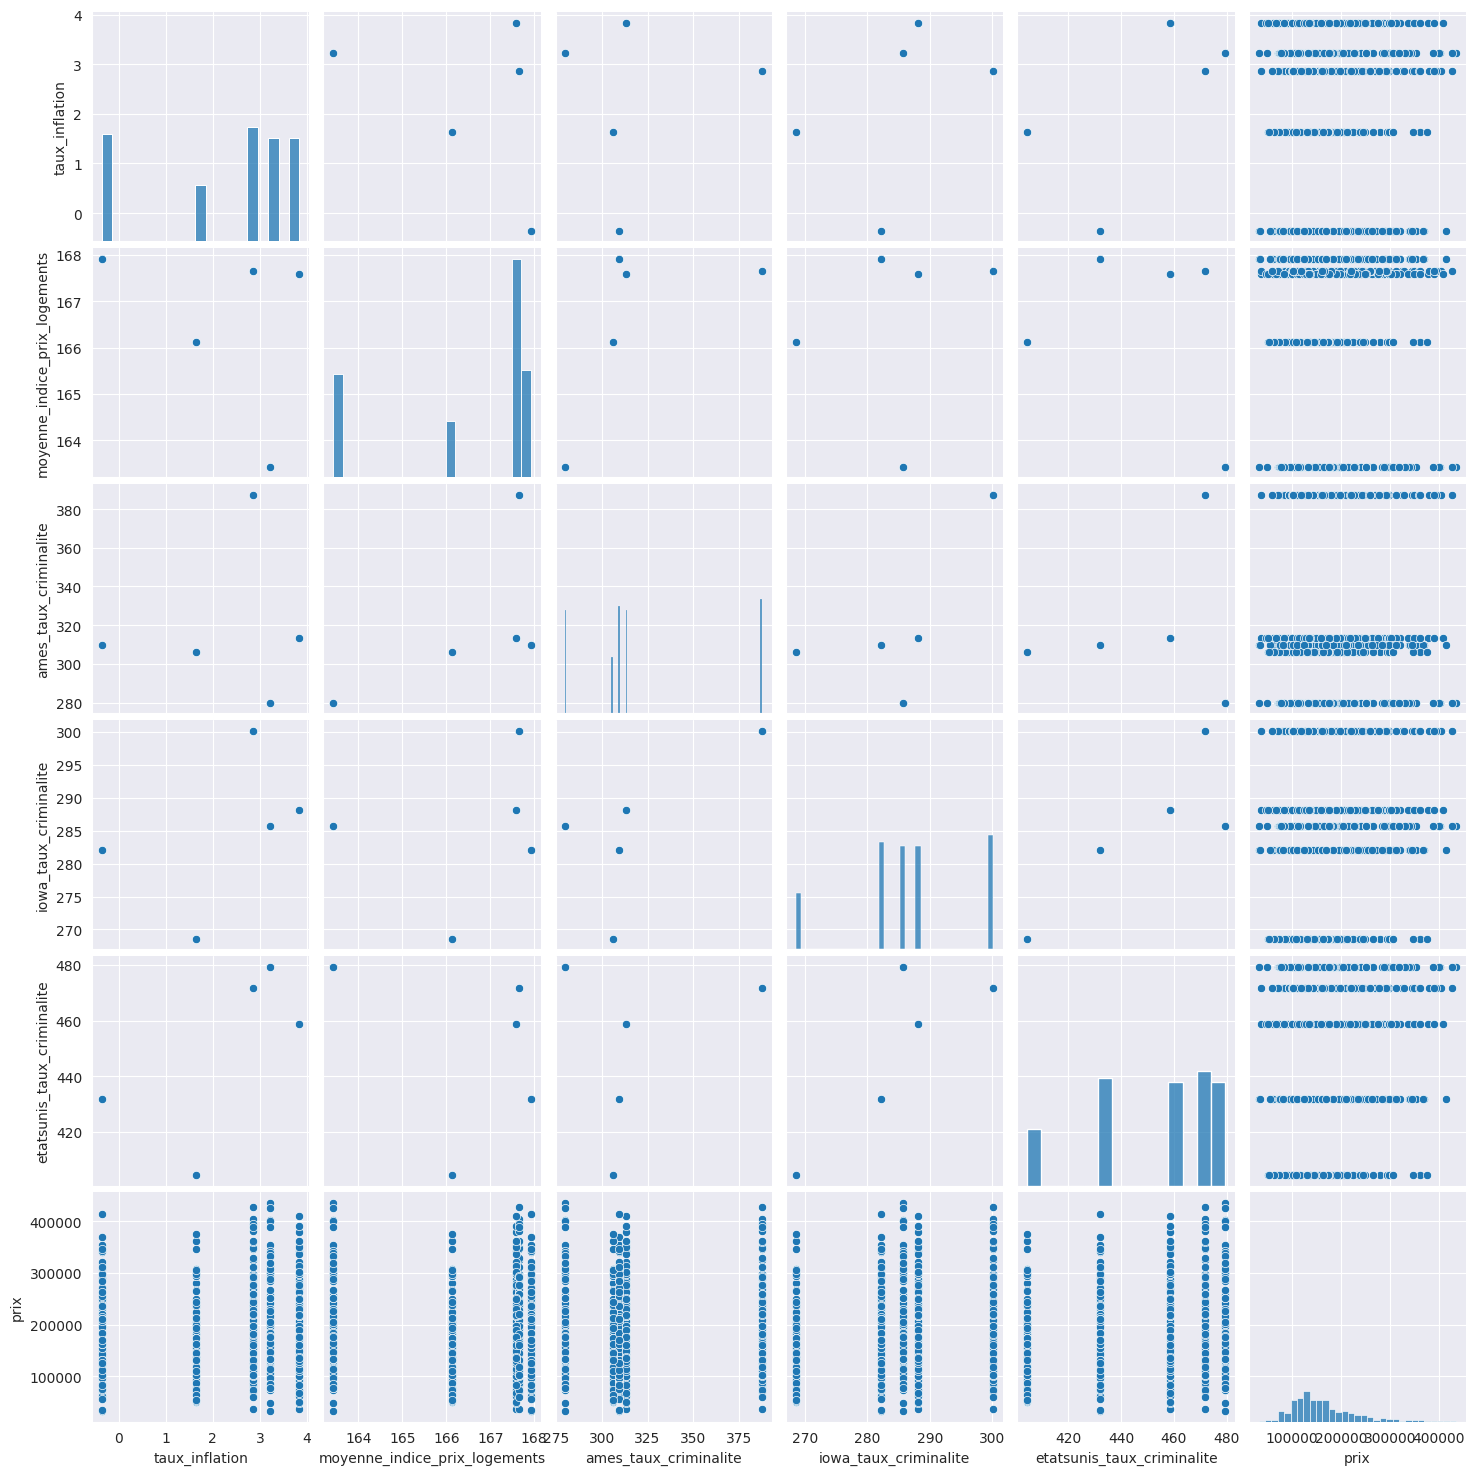

In [ ]:
sns.pairplot(data=data_etape5, vars=['taux_inflation', 'moyenne_indice_prix_logements', 'ames_taux_criminalite', 'iowa_taux_criminalite', 'etatsunis_taux_criminalite', 'prix'])

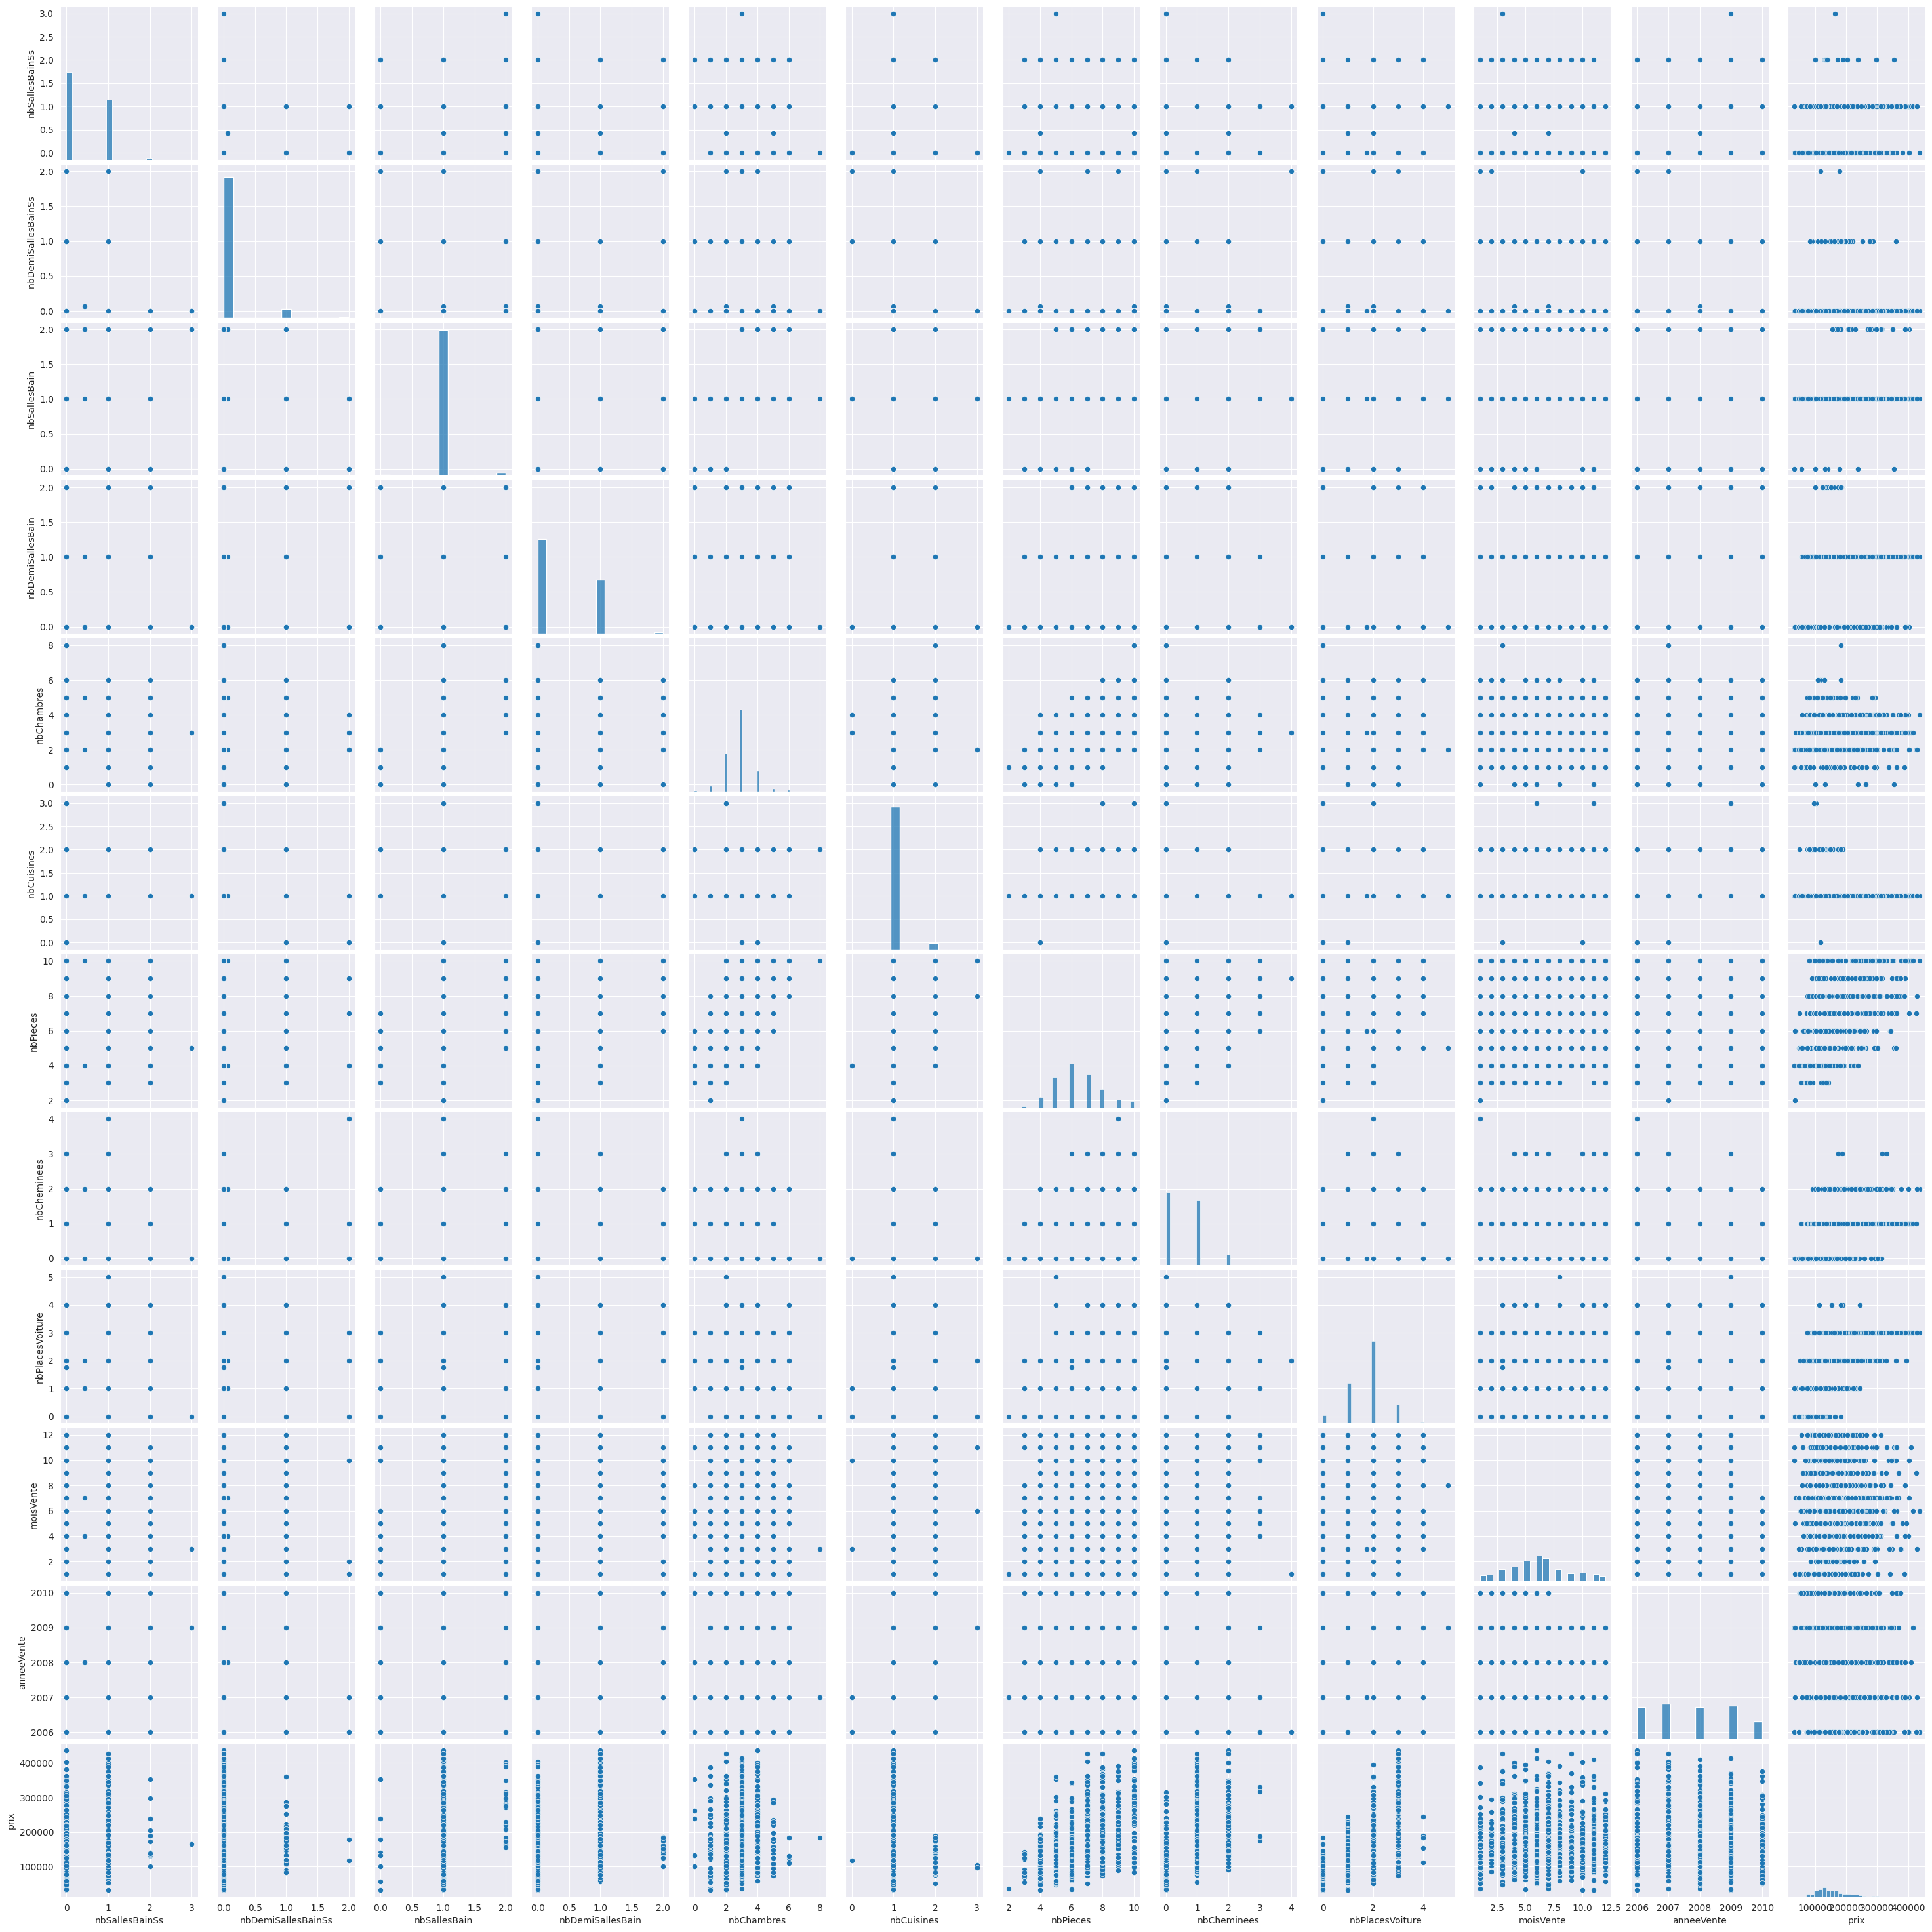

In [ ]:
# Liste des variables
features = ['nbSallesBainSs', 'nbDemiSallesBainSs', 'nbSallesBain',
            'nbDemiSallesBain', 'nbChambres', 'nbCuisines', 'nbPieces', 'nbCheminees', 'nbPlacesVoiture',
            'moisVente', 'anneeVente', 'prix']

# Création d'une DataFrame contenant seulement les variables sélectionnées
selected_data = data_etape5[features]

# Tracer la matrice de graphiques de dispersion
sns.pairplot(selected_data)
plt.show()

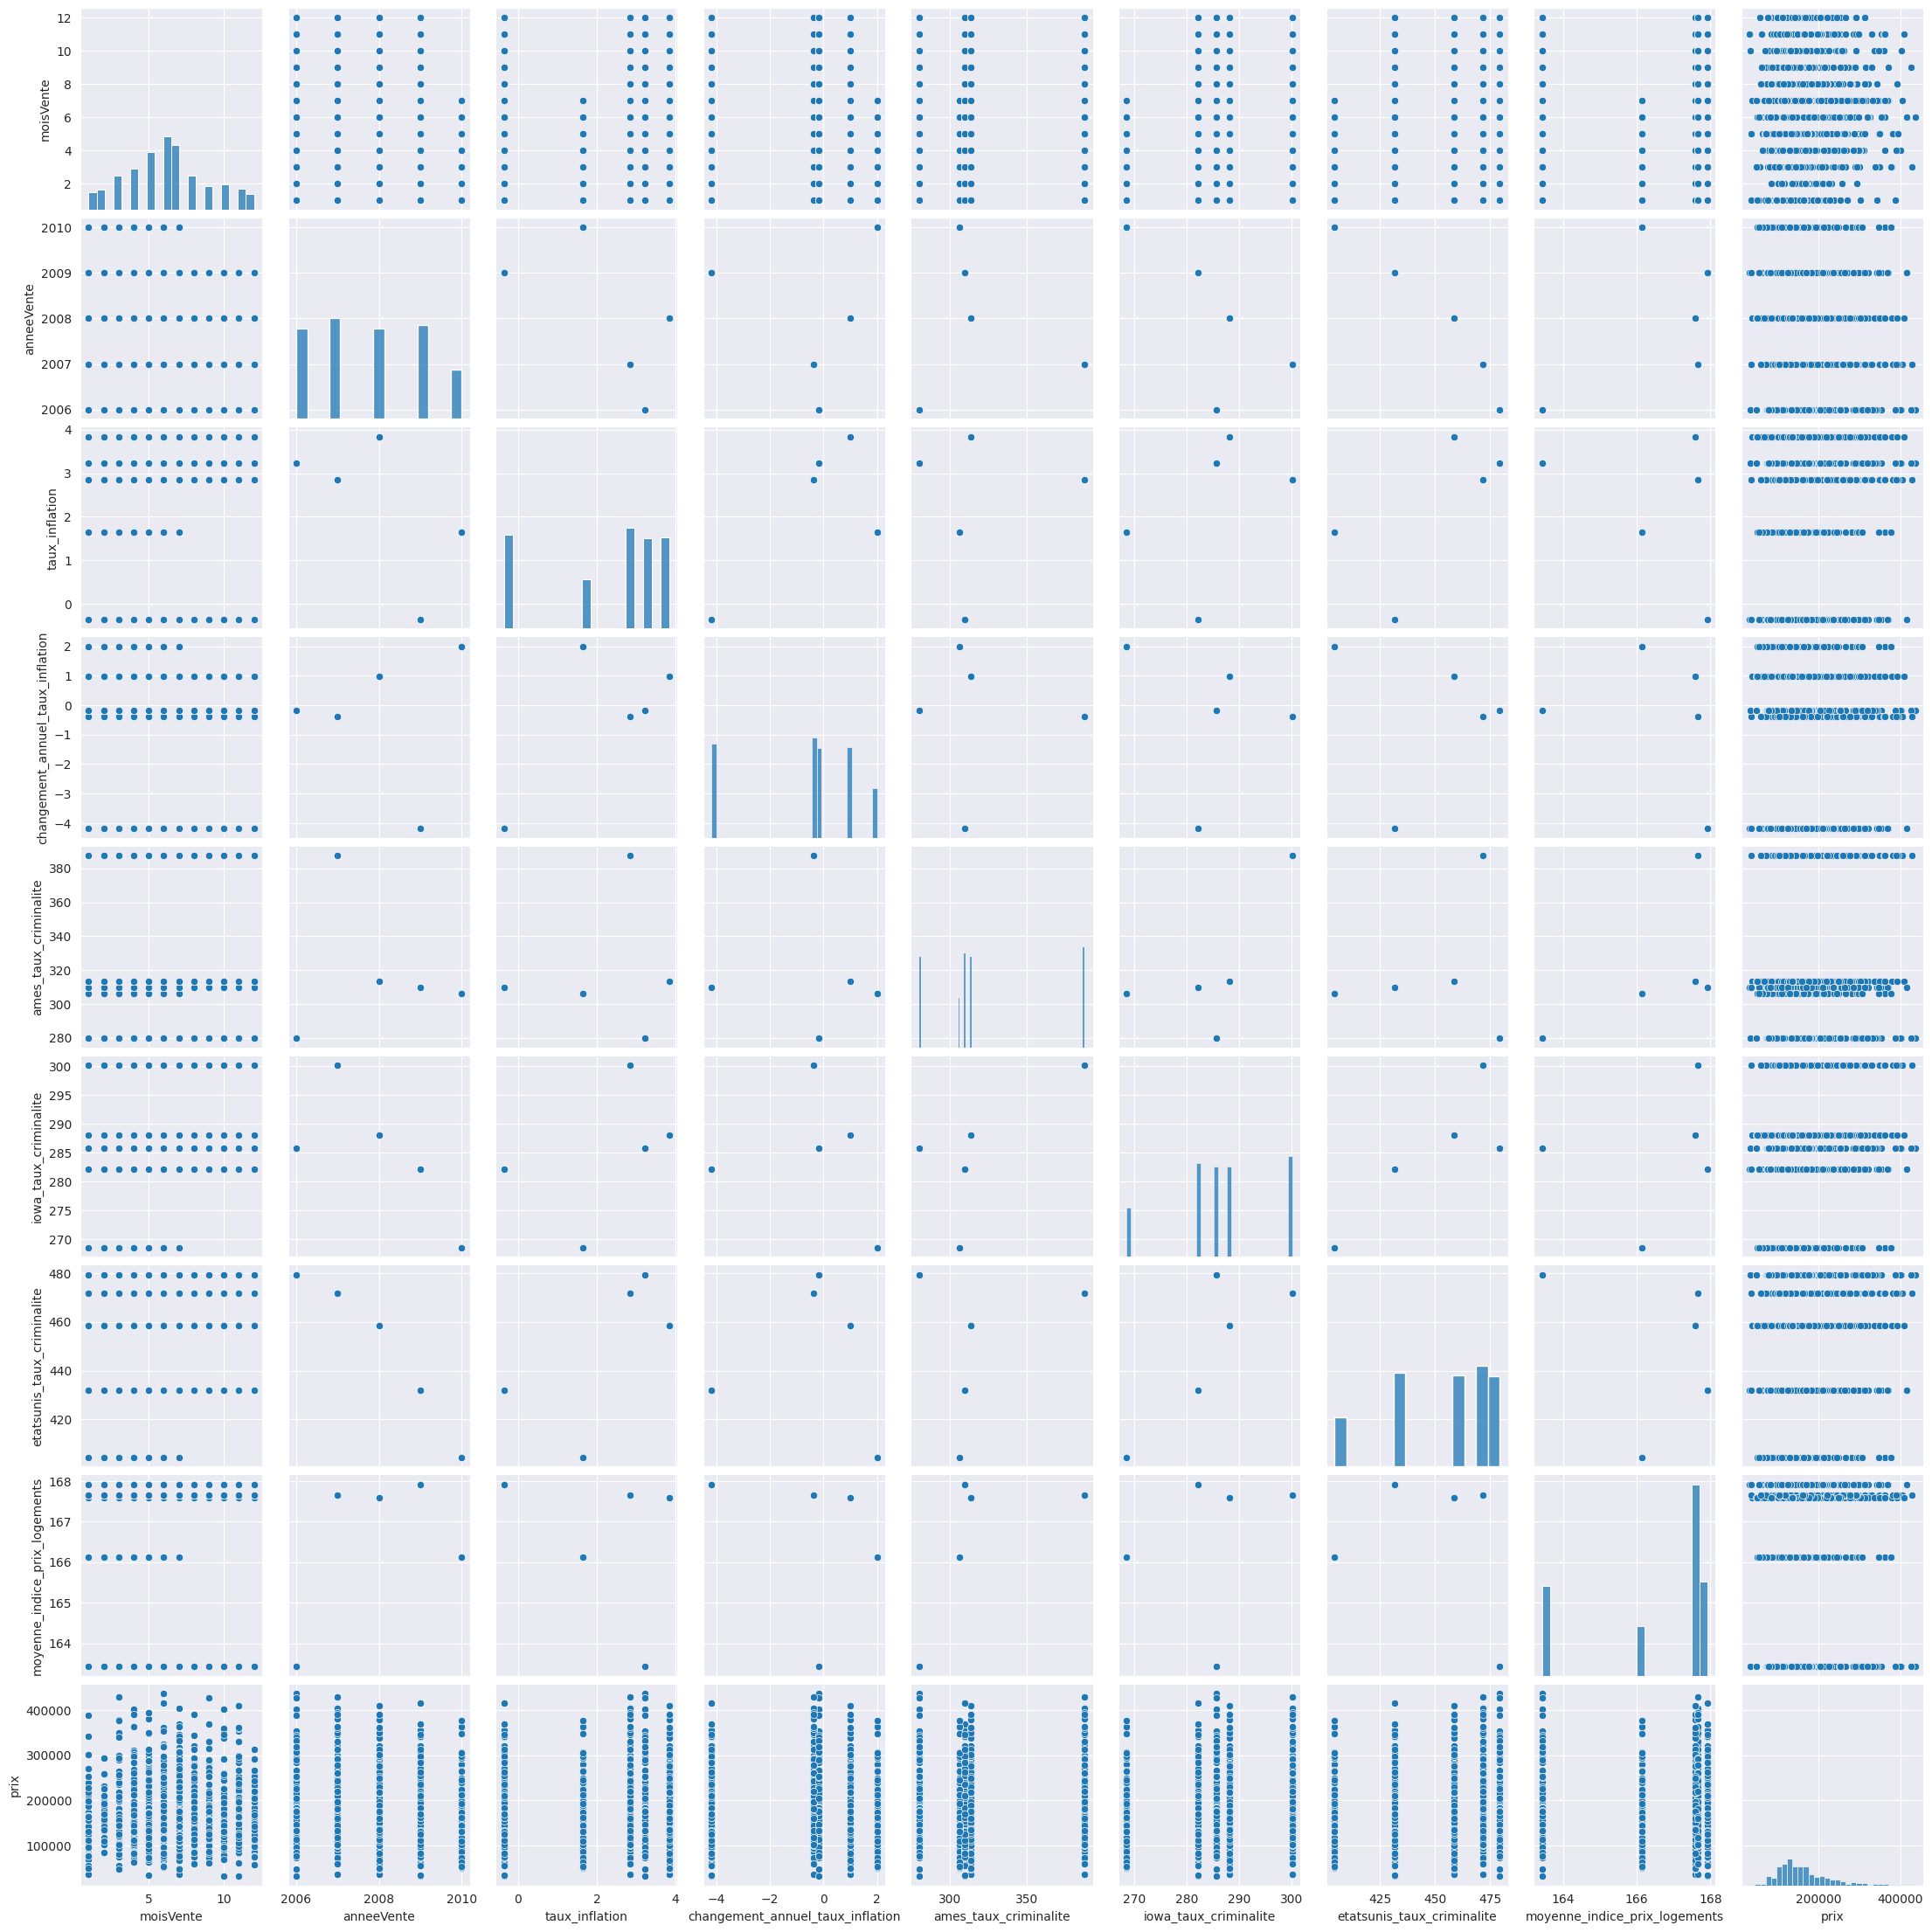

In [ ]:
# Liste des variables
features = ['moisVente', 'anneeVente', 'taux_inflation', 'changement_annuel_taux_inflation',
            'ames_taux_criminalite', 'iowa_taux_criminalite', 'etatsunis_taux_criminalite',
            'moyenne_indice_prix_logements','prix']

# Création d'une DataFrame contenant seulement les variables sélectionnées
selected_data = data_etape5[features]

# Tracer la matrice de graphiques de dispersion
sns.pairplot(selected_data)
plt.show()

La cinquième phase de l'étude est désormais terminée. Poursuivons avec la  prochaine étape pour continuer notre progression 😉